In [1]:
from content import ContentGetter
from assistant import Assistant
%load_ext autoreload
%autoreload 2

## Create an assistant for the user

In [2]:
assistant = Assistant(user_filename='users.csv')

In [3]:
response1 = assistant.recommend_event()
response2 = assistant.recommend_film()
response3 = assistant.recommend_band()
response4 = assistant.recommend_song()

print("Recommended Event: \n{}\n".format(response1))
print("Recommended Film: \n{}\n".format(response2))
print("Recommended Band: \n{}\n".format(response3))
print("Recommended Song: \n{}\n".format(response4))

year: 1992
Recommended Event: 


 launch of the Hubble Space Telescope.

Recommended Film: 


Reservoir Dogs

Recommended Band: 


N.E.R.D.

Recommended Song: 


"Feel Good Inc."



## Get Content from answers

https://hubblesite.org/files/live/sites/hubble/files/home/_images/hs-sts125-launch-2400x1200.jpg?t=tn370


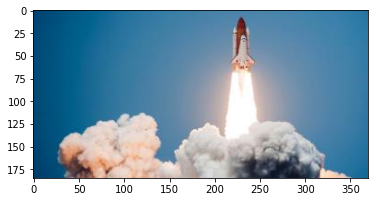

In [4]:
import matplotlib.pyplot as plt
import cv2
import urllib
import numpy as np
from assistant import Assistant
from content import ContentGetter

content_getter = ContentGetter()
images = content_getter.get_images(response1)
for image_url in images:
    print(image_url)
    req = urllib.request.urlopen(image_url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1) # 'Load it as it is'
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
    plt.imshow(img)
    plt.show()

In [ ]:
print(content_getter.get_yt_link(response2))
print(content_getter.get_yt_link(response3))
print(content_getter.get_yt_link(response4))


<bound method SearchCore.result of <youtubesearchpython.search.VideosSearch object at 0x7f219c9eaca0>>
('"Reservoir Dogs" Best Scene HD', 'https://www.youtube.com/watch?v=xerx80SWgkA')
<bound method SearchCore.result of <youtubesearchpython.search.VideosSearch object at 0x7f219c9d5040>>
('Outkast - Ms. Jackson (Official HD Video)', 'https://www.youtube.com/watch?v=MYxAiK6VnXw')
<bound method SearchCore.result of <youtubesearchpython.search.VideosSearch object at 0x7f21d2617700>>
('Gorillaz - Feel Good Inc. (Official Video)', 'https://www.youtube.com/watch?v=HyHNuVaZJ-k')


## Add info to story and answer questions about patient

In [5]:
assistant.add_info_user_story(" I am married and have 2 daughters named Diana and Grace, they are 35 and 25 years old. I worked as a civil engineer in Cali, Colombia for almost 30 years. I am a huge fan of football, in particular of the amazing team Millonarios of Bogota")

In [6]:
print(assistant.ask("What are the names of my daughters? \n\n"))
print(assistant.ask("What is my favorite football team? \n\n"))




Your daughters are named Diana and Grace.


Your favorite football team is Millonarios of Bogota.


## Analyze sentiment of potential feedback

In [9]:
from sentiment_analysis import analyze_sentiment

In [11]:
feedback1 = "I am a big fan of astronomy, I really liked seeing the launch of the telescope to the space"
feedback2 = "Exploring the space is a waste of money"
feedback3 = "This makes me remember the dead of the astronauts of the Columbia shuttle"
print(analyze_sentiment(feedback1))
print(analyze_sentiment(feedback2))
print(analyze_sentiment(feedback3))

 Excited
 angry
 Sad


# Old implementation (ignore)

In [ ]:
import os
import openai
import config
import templates
import csv
import random
from easydict import EasyDict as edict
%load_ext autoreload
%autoreload 2
openai.api_key = config.OPENAI_API_KEY

## Recommender Class

In [3]:
class Recommender(object):
    def __init__(self, engine="text-davinci-002"):
        self.engine = engine

    def recommend_film(self,film):
        return self.send_query(templates.film_query.format(film))

    def recommend_band(self,band):
        return self.send_query(templates.band_query.format(band))

    def recommend_song(self,band):
        return self.send_query(templates.song_query.format(band))

    def recommend_event(self,city,birth_year):
        year = int(birth_year)+random.randint(15,50)
        year = int((year/10)*10)
        print("year: {}".format(year))
        return self.send_query(templates.historical_query.format(city,year))

    def send_query(self,msg,max_tokens=32):
        response = openai.Completion.create(
        engine=self.engine,
        prompt=msg,
        temperature=0.6,
        max_tokens=max_tokens,
        top_p=0.8,
        frequency_penalty=0,
        presence_penalty=0
        )
        return response["choices"][0]["text"]


## Read user data from file

In [4]:
user = {}
with open('users.csv', mode='r', encoding='utf-16') as inp:
    reader = csv.reader(inp)
    print(reader)
    user = {cols[0]:cols[1] for cols in reader}
user = edict(user)
print(user)

{'id': '1', 'name': 'Juan', 'birth_year': '1955', 'birth_place': 'United States', 'current_place': 'Germany', 'favorite_band': 'Gorillaz', 'favorite_movie': 'Pulp Fiction'}


## Send Initial query:
"All responses should be concise, true and talk about positive things"

In [5]:
recommender = Recommender()
recommender.send_query(templates.init_query.format(user.name))

'\nJuan is a great student who always puts his best foot forward. He is a role model to his peers and is always willing to help out. Juan'

## Get 4 recommendations on different topics

In [6]:
response1 = recommender.recommend_event(user.birth_place, user.birth_year)
response2 = recommender.recommend_film(user.favorite_movie)
response3 = recommender.recommend_band(user.favorite_band)
response4 = recommender.recommend_song(user.favorite_band)
print("Recommended Event: \n{}\n".format(response1))
print("Recommended Film: \n{}\n".format(response2))
print("Recommended Band: \n{}\n".format(response3))
print("Recommended Song: \n{}\n".format(response4))

year: 1979
Recommended Event: 


election of Ronald Reagan as President.

Recommended Film: 


Reservoir Dogs

Recommended Band: 


Outkast

Recommended Song: 


"Feel Good Inc."



## Get Images from google search

election of Ronald Reagan as President.


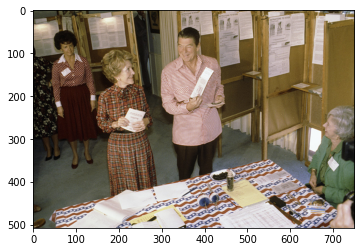

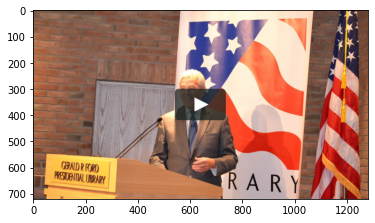

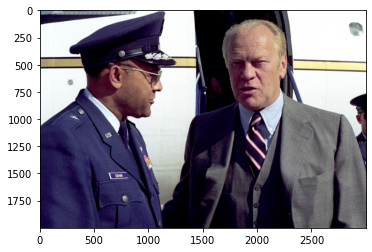

In [7]:
#Searching for info on events
response1 = response1.replace('\n','')
print(response1)
from google_images_search import GoogleImagesSearch
gis = GoogleImagesSearch(config.GCS_DEVELOPER_KEY, config.GCS_CX)
# define search params
_search_params = {
    'q': response1,
    'num': 3,
    'fileType': 'jpg|gif|png',
    'rights': 'cc_publicdomain|cc_attribute|cc_sharealike|cc_noncommercial|cc_nonderived',
    # 'safe': 'active|high|medium|off|safeUndefined', ##
    # 'imgType': 'clipart|face|lineart|stock|photo|animated|imgTypeUndefined', ##
    # 'imgSize': 'large|medium|small|xlarge', ##
    # 'imgDominantColor': 'black|blue|brown|gray|green|orange|pink|purple|red|teal|white|yellow|imgDominantColorUndefined', ##
    # 'imgColorType': 'color|gray|mono|trans|imgColorTypeUndefined' ##
}
gis.search(search_params=_search_params)

#Plot first 3 images
import matplotlib.pyplot as plt
import cv2
import urllib
import numpy as np
%matplotlib inline
for image in gis.results():
    image_url = image.url
    req = urllib.request.urlopen(image_url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1) # 'Load it as it is'
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
    plt.imshow(img)
    plt.show()

## Get youtube urls

In [8]:
from youtubesearchpython import VideosSearch
response3 = response3.replace('\n','').replace(' ','')
videosSearch = VideosSearch(response3, limit = 1)
print(videosSearch.result()['result'][0]['title'])
print(videosSearch.result()['result'][0]['link'])

Outkast - Ms. Jackson (Official HD Video)
https://www.youtube.com/watch?v=MYxAiK6VnXw


In [9]:
response4 = response4.replace('\n','').replace(' ','')
videosSearch = VideosSearch(response4, limit = 1)
print(videosSearch.result()['result'][0]['title'])
print(videosSearch.result()['result'][0]['link'])

Gorillaz - Feel Good Inc. (Official Video)
https://www.youtube.com/watch?v=HyHNuVaZJ-k


In [10]:
response2 = response2.replace('\n','').replace(' ','')
videosSearch = VideosSearch(response2+' trailer', limit = 1)
print(videosSearch.result()['result'][0]['title'])
print(videosSearch.result()['result'][0]['link'])

Reservoir Dogs (1992) Official Trailer #1 - Quentin Tarantino Movie
https://www.youtube.com/watch?v=vayksn4Y93A


# Answer questions about one's history

In [11]:
my_story = "My name is David, I was born in 1955. I am married and have 2 daughters named Diana and Grace, they are 35 and 25 years old. I worked as a civil engineer in Cali, Colombia for almost 30 years. I am a huge fan of football, in particular of the amazing team Millonarios of Bogota"

In [12]:
recommender.send_query(my_story)
recommender.send_query("What are the names of my daughters?\n\n", max_tokens=64)


"\n\nYour daughters' names are not provided."

In [3]:
from random import randint
print(randint(0,1))

0
